In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import json

### Đọc dữ liệu từ file rồi convert thành dataframe

In [2]:
with open ('/home/straw/Data_mining/Technical_Tutorial/Pandas_Matplotlib/sosanhgia/sosanhgia.csv', 'r') as file:
    data_file = file.readlines()
    row_list = []

    for line in data_file:
        # convert từ str sang dict 
        product = json.loads(line)

        # bỏ các list đi ko 1 product sẽ ra nhiều dòng 
        if 'category' in product:
            product['category'] = product['category'][0]

        # tạo list các dict để nhét vào DF cùng lúc cho nhanh (gấp 10 concat từng df một)
        row_list.append(product)

products = pd.DataFrame(row_list)
products
    


,link,category,name,img_url,brand,short_desc,priority_price,priority_store,num_of_product,num_of_store,lowest_price,highest_price
0,https://www.sosanhgia.com/p186133-laptop-hp-pa...,Máy tính - Thiết bị VP,Laptop HP Pavilion 15-CS3060TX 8RJ61PA,https://img.sosanhgia.com/images/500x0/b54bfba...,HP,Bộ VXL: Core i5 1035G1 1.0Ghz-6Mb\n - Cạc đồ ...,17.100.000,Shopee,19.0,14.0,16.790.000,18.290.000
1,https://www.sosanhgia.com/p2884-macbook-air-md...,Máy tính - Thiết bị VP,Macbook AIR MD711 11.6inch,https://img.sosanhgia.com/images/500x0/10e76ab...,Apple,,9.900.000,Lazada,5.0,3.0,9.900.000,12.183.024
2,https://www.sosanhgia.com/p5498-macbook-pro-mf...,Máy tính - Thiết bị VP,Macbook Pro MF839 2015,https://img.sosanhgia.com/images/500x0/53d11ee...,Apple,CPU: Core i5 5257U\n\nRAM/ HDD: 8Gb/ 128Gb SSD...,23.978.740,Fado,4.0,2.0,18.572.680,19.550.202
3,https://www.sosanhgia.com/p39528-macbook-air-m...,Máy tính - Thiết bị VP,Macbook Air MC965,https://img.sosanhgia.com/images/500x0/b674cc0...,Apple,Độ lớn màn hình (inch) 13.3 inch\n Độ phân giả...,16.142.399,Fado,NaN,NaN,None,None
4,https://www.sosanhgia.com/p167163-mang-boc-thu...,Nhà cửa đời sống,Màng bọc thực phẩm Ringo ST618,https://img.sosanhgia.com/images/500x0/a128e6b...,KHÁC,"- Sản phẩm không chứa DEHA , DEHP độc hại\n - ...",357.000,Tiki,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2809,https://www.sosanhgia.com/p7434-may-chieu-epso...,Máy tính - Thiết bị VP,Máy chiếu Epson EB-X03,https://img.sosanhgia.com/images/500x0/b2710ad...,Epson,"Cường độ sáng: 2,700 Ansi Lumens\n\nĐộ phân gi...",9.459.000,Lazada,NaN,NaN,None,None
2810,https://www.sosanhgia.com/p22608-man-hinh-asus...,Máy tính - Thiết bị VP,Màn Hình Asus PB298Q 29inch,https://img.sosanhgia.com/images/500x0/63889f5...,Asus,Kích thước: 29 inch\n Độ phân giải: 2560 x 108...,5.999.000,HanoiComputer,NaN,NaN,None,None
2811,https://www.sosanhgia.com/p206847-dau-me-beksu...,Thực phẩm,DẦU MÈ BEKSUL 500ML,https://img.sosanhgia.com/images/500x0/fbff8f5...,Beksul,,259.000,Lazada,2.0,2.0,259.000,358.800
2812,https://www.sosanhgia.com/p30270-muc-in-brothe...,Máy tính - Thiết bị VP,"Mực in Brother LC-37BK Dùng cho máy DCP-135C,1...",https://img.sosanhgia.com/images/500x0/88145f9...,Brother,Màu mực: đen\n Số trang in 350 trang\n Bền màu...,330.000,Tiki,2.0,2.0,330.000,355.000


### Thống kê số sản phẩm mỗi loại

In [3]:
group_by_category = products.groupby('category')
category_sum = group_by_category.sum()

product_cnt = []
# tính số sản phẩm trong từng group
for group in group_by_category:
    product_cnt.append(group_by_category.get_group(group[0]).shape[0])

# thay đổi column ban đầu 
category_sum['num_of_product'] = product_cnt
category_sum


,num_of_product,num_of_store
category,,
Bách hóa,15,74.0
Khác,6,15.0
Kỹ thuật số,28,362.0
Máy tính - Thiết bị VP,64,124.0
Mẹ và Bé,11,41.0
Nhà cửa đời sống,55,106.0
Sách,2292,14531.0
Sức khỏe - Làm đẹp,251,719.0
Thiết bị di động,7,8.0


### Thống kê các loại sản phẩm ko phải sách, làm đẹp

In [4]:
# xóa row dựa vào index
category_sum = category_sum.drop(['Sách', 'Sức khỏe - Làm đẹp'])


kind = category_sum.index
product_num = category_sum['num_of_product']
store_num = category_sum['num_of_store']

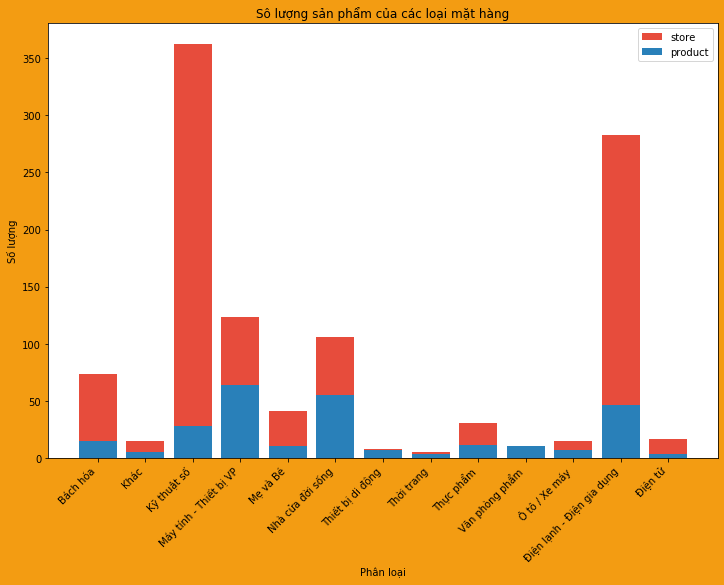

In [5]:
plt.figure(figsize=[12, 8], facecolor='#f39c12',)
plt.title('Sô lượng sản phẩm của các loại mặt hàng')

plt.bar(kind, store_num, label = 'store', color = '#e74c3c')
plt.bar(kind, product_num, label = 'product', color = '#2980b9')

plt.xlabel('Phân loại')
plt.ylabel('Số lượng')

plt.xticks(kind, ha = 'right')
plt.xticks(rotation=45)

plt.legend()

### Thống kê các số sản phẩm bán rẻ của một số hãng thương mại điện tử hàng đầu 

In [6]:
# tương tự như category
group_by_priority_store = products.groupby('priority_store')
priority_store_sum = group_by_priority_store.sum()

product_cnt = []
for group in group_by_priority_store:
    product_cnt.append(group_by_priority_store.get_group(group[0]).shape[0])

priority_store_sum['num_of_product'] = product_cnt

In [7]:
# get famous e_commerce brand
e_commerce_brand = pd.DataFrame(priority_store_sum.loc[['Tiki', 'Sendo', 'Lazada', 'Shopee', 'FAHASA']])

brand_name = e_commerce_brand.index
brand_product = e_commerce_brand['num_of_product']

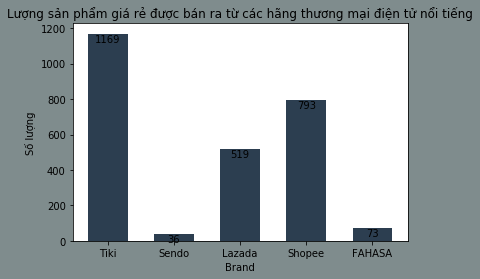

In [8]:
plt.figure(facecolor='#7f8c8d')
plt.title('Lượng sản phẩm giá rẻ được bán ra từ các hãng thương mại điện tử nổi tiếng')

plt.xlabel('Brand')
plt.ylabel('Số lượng')

for bar in plt.bar(brand_name, brand_product, color = '#2c3e50', width = .6):        
    plt.text(bar.get_x() + .3,             # x position of label
             bar.get_height() - 45,         # y position of label
             bar.get_height(),              # actual value of label
             ha='center',                     # căn lề
             color='black')



### Các số liệu về giá của sách 

In [9]:
# lấy giá min, max từng sp
books = products.groupby('category').get_group('Sách')
books_price = pd.DataFrame(books.loc[:,['lowest_price', 'highest_price']])
books_price.shape

# loại bỏ sách ko có giá
none_row = []
for row in range (books_price.shape[0]):
    if books_price.iloc[row, 0] == None or books_price.iloc[row, 1] == None:
        none_row.append(books_price.index[row])
books_price = books_price.drop(none_row)

# convert giá từ string về int 
for i in range (books_price.shape[0]):
    for j in range (books_price.shape[1]):
        price = books_price.iloc[i, j]
        price = price.split('.')
        price = ''.join(price)
        
        books_price.iloc[i, j] = int(price)
        if j == 1: 
            books_price.iloc[i, j] = max(books_price.iloc[i, 0], books_price.iloc[i, 1])


books_price.describe()

,lowest_price,highest_price
count,1641.000000,1.641000e+03
mean,86861.174893,1.356836e+05
std,73467.365135,3.140264e+05
min,0.000000,8.500000e+03
25%,41000.000000,5.980000e+04
50%,65700.000000,9.600000e+04
75%,102990.000000,1.540000e+05
max,629304.000000,1.177085e+07
